In [1]:
# Data Processing
import string
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

In [2]:
# read RData
#res = pyreadr.read_r('5v_cleandf.RData')
!pwd

/media/csuser/DATA/ARTEMIS/romania


In [3]:
#df = res["df"]
df = pd.read_csv('/media/csuser/DATA/ARTEMIS/romania/romania_triage.csv')
# df.dropna()
# df.to_csv('romania_triage.csv')

In [4]:
# df = df.dropna()
# with all the 972 columns, if you run dropna directly, there actually ends up being 0 
# remaining rows

df.reset_index(inplace=True, drop=True)
df.shape

(560486, 973)

In [5]:
keys = df.keys()
new_keys = ['triage_vital_temp', 'triage_vital_rr', 'triage_vital_hr', 'triage_vital_sbp', 'triage_vital_dbp', 'triage_vital_o2', 'esi', 'age']
reach = False

for i in range(len(keys)):
    if(keys[i]!='2ndarymalig' and reach==False):
        # print(keys[i])
        continue
    reach = True
    if(keys[i]!='whtblooddx'):
        new_keys.append(keys[i])
    else:
        new_keys.append(keys[i])
        break

reach = False
for i in range(len(keys)):
    if(keys[i]!='cc_abdominalcramping' and reach==False):
        continue
    reach = True
    if(keys[i]!='cc_wristpain'):
        new_keys.append(keys[i])
    else:
        new_keys.append(keys[i])
        break
print(len(list(set(new_keys))))
print(len(new_keys))
#df = df[['triage_vital_temp', 'triage_vital_rr', 'triage_vital_hr', 'triage_vital_sbp', 'triage_vital_dbp', 'triage_vital_o2', 'esi', 'age', 'gender', 'arrivalmode', 'previousdispo']]
df = df[new_keys]
df = df.dropna()
df.reset_index(inplace=True, drop=True)
df.shape


489
489


(269549, 489)

In [6]:
df = df[(df["triage_vital_temp"] >= 51.8) & (df["triage_vital_temp"] <= 108.14) & (df["triage_vital_hr"] > 0) & (df["triage_vital_hr"] < 140) & (df["triage_vital_o2"] > 0) & (df["triage_vital_o2"] < 100)]
df = df.drop(df.loc[df['triage_vital_sbp'] > 400].index) # impossible
df = df.drop(df.loc[df['triage_vital_dbp'] > 400].index) # impossible
df = df.drop(df.loc[df['triage_vital_rr'] > 200].index) # impossible

/home/csuser/mambaforge/envs/tim/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


109106    2.0
141020    1.0
Name: esi, dtype: float64
(268469, 489)


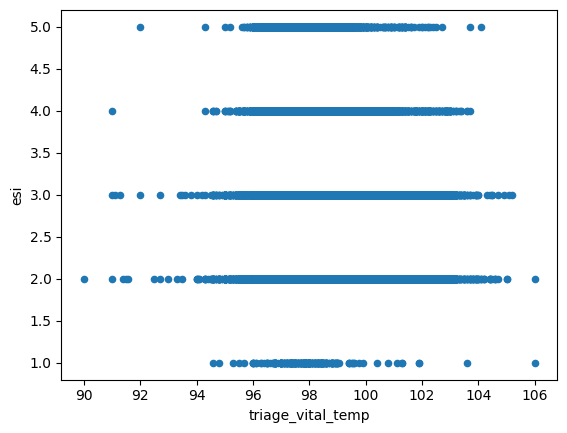

In [7]:
df.plot.scatter(x="triage_vital_temp", y="esi")
print(df.esi[df.loc[df["triage_vital_temp"] == max(df.triage_vital_temp)].index])
print(df.shape)

In [8]:
df

,triage_vital_temp,triage_vital_rr,triage_vital_hr,triage_vital_sbp,triage_vital_dbp,triage_vital_o2,esi,age,2ndarymalig,abdomhernia,...,cc_vaginaldischarge,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain
0,97.0,18.0,63.0,146.0,85.0,97.0,4.0,40.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,97.8,16.0,78.0,134.0,78.0,97.0,2.0,66.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,98.4,18.0,101.0,133.0,72.0,97.0,3.0,84.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,98.5,18.0,76.0,143.0,87.0,98.0,3.0,86.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,97.8,17.0,88.0,155.0,75.0,98.0,4.0,87.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269544,98.0,16.0,71.0,117.0,74.0,95.0,3.0,49.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
269545,98.1,16.0,89.0,114.0,75.0,94.0,3.0,49.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
269546,97.5,18.0,89.0,125.0,82.0,94.0,3.0,50.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
269547,97.5,18.0,89.0,135.0,92.0,98.0,3.0,50.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df["esi"].value_counts()

3.0    117852
4.0     71472
2.0     67048
5.0     11835
1.0       262
Name: esi, dtype: int64

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.model_selection import KFold
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2024-02-29 13:48:59.655874: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-29 13:48:59.797993: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-29 13:49:00.474354: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [11]:
# Normalizing the data
numerical_cols = ['triage_vital_temp', 'triage_vital_hr', 'triage_vital_o2', 'triage_vital_sbp', 'triage_vital_dbp', 'triage_vital_rr', 'age']
for col in numerical_cols:
   df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

In [12]:
# Oversample and plot imbalanced dataset with SMOTE
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

In [13]:
df

,triage_vital_temp,triage_vital_rr,triage_vital_hr,triage_vital_sbp,triage_vital_dbp,triage_vital_o2,esi,age,2ndarymalig,abdomhernia,...,cc_vaginaldischarge,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain
0,0.43750,0.163934,0.302752,0.363985,0.365854,0.948718,4.0,0.247191,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.48750,0.131148,0.440367,0.318008,0.323171,0.948718,2.0,0.539326,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.52500,0.163934,0.651376,0.314176,0.286585,0.948718,3.0,0.741573,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.53125,0.163934,0.422018,0.352490,0.378049,0.974359,3.0,0.764045,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.48750,0.147541,0.532110,0.398467,0.304878,0.974359,4.0,0.775281,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269544,0.50000,0.131148,0.376147,0.252874,0.298780,0.897436,3.0,0.348315,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
269545,0.50625,0.131148,0.541284,0.241379,0.304878,0.871795,3.0,0.348315,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
269546,0.46875,0.163934,0.541284,0.283525,0.347561,0.871795,3.0,0.359551,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
269547,0.46875,0.163934,0.541284,0.321839,0.408537,0.974359,3.0,0.359551,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
X = df.drop(['esi'], axis=1).to_numpy()
y = df['esi'].to_numpy()
counter = Counter(y)
print(counter)

Counter({3.0: 117852, 4.0: 71472, 2.0: 67048, 5.0: 11835, 1.0: 262})


In [15]:
df

,triage_vital_temp,triage_vital_rr,triage_vital_hr,triage_vital_sbp,triage_vital_dbp,triage_vital_o2,esi,age,2ndarymalig,abdomhernia,...,cc_vaginaldischarge,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain
0,0.43750,0.163934,0.302752,0.363985,0.365854,0.948718,4.0,0.247191,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.48750,0.131148,0.440367,0.318008,0.323171,0.948718,2.0,0.539326,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.52500,0.163934,0.651376,0.314176,0.286585,0.948718,3.0,0.741573,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.53125,0.163934,0.422018,0.352490,0.378049,0.974359,3.0,0.764045,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.48750,0.147541,0.532110,0.398467,0.304878,0.974359,4.0,0.775281,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269544,0.50000,0.131148,0.376147,0.252874,0.298780,0.897436,3.0,0.348315,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
269545,0.50625,0.131148,0.541284,0.241379,0.304878,0.871795,3.0,0.348315,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
269546,0.46875,0.163934,0.541284,0.283525,0.347561,0.871795,3.0,0.359551,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
269547,0.46875,0.163934,0.541284,0.321839,0.408537,0.974359,3.0,0.359551,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


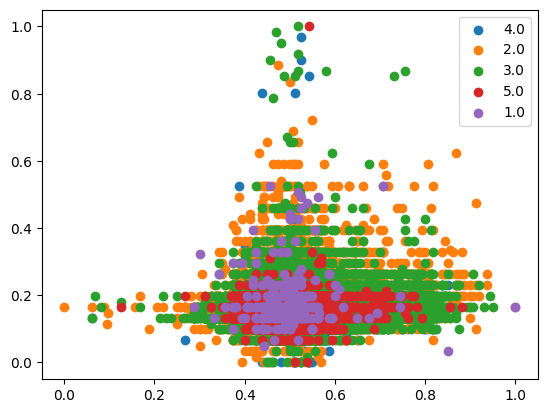

In [16]:
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [17]:
over = SMOTE(sampling_strategy={1: 117852, 2: 117852, 3: 117852, 4: 117852, 5: 117852})
# under = RandomUnderSampler(sampling_strategy={1: 117852, 2: 117852, 3: 117852, 4: 117852, 5: 117852})
steps = [('o', over),]
pipeline = Pipeline(steps=steps)

X, y = pipeline.fit_resample(X, y)

In [18]:
counter = Counter(y)
print(counter)

Counter({4.0: 117852, 2.0: 117852, 3.0: 117852, 5.0: 117852, 1.0: 117852})


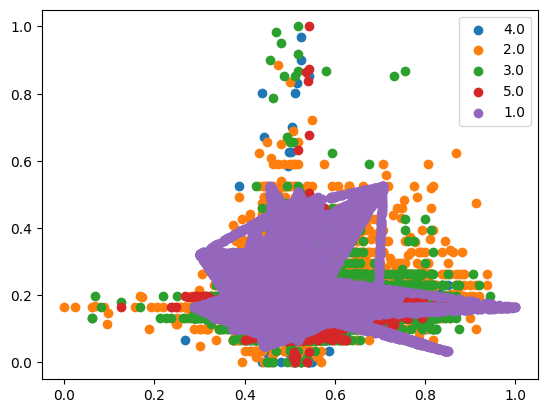

In [19]:
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [20]:
df

,triage_vital_temp,triage_vital_rr,triage_vital_hr,triage_vital_sbp,triage_vital_dbp,triage_vital_o2,esi,age,2ndarymalig,abdomhernia,...,cc_vaginaldischarge,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain
0,0.43750,0.163934,0.302752,0.363985,0.365854,0.948718,4.0,0.247191,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.48750,0.131148,0.440367,0.318008,0.323171,0.948718,2.0,0.539326,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.52500,0.163934,0.651376,0.314176,0.286585,0.948718,3.0,0.741573,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.53125,0.163934,0.422018,0.352490,0.378049,0.974359,3.0,0.764045,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.48750,0.147541,0.532110,0.398467,0.304878,0.974359,4.0,0.775281,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269544,0.50000,0.131148,0.376147,0.252874,0.298780,0.897436,3.0,0.348315,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
269545,0.50625,0.131148,0.541284,0.241379,0.304878,0.871795,3.0,0.348315,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
269546,0.46875,0.163934,0.541284,0.283525,0.347561,0.871795,3.0,0.359551,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
269547,0.46875,0.163934,0.541284,0.321839,0.408537,0.974359,3.0,0.359551,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
import numpy as np
import pandas as pd

# Concatenate X and y numpy arrays
Xy = np.concatenate((X, y.reshape(-1, 1)), axis=1)

In [22]:
!pwd

/media/csuser/DATA/ARTEMIS/romania


In [23]:

# Create a pandas DataFrame from the concatenated array
new_keys.remove('esi')
new_keys.append('esi')
df = pd.DataFrame(data=Xy, columns=new_keys)
df
# df.to_csv('/media/csuser/DATA/ARTEMIS/romania/rom_triage_smote.csv')

,triage_vital_temp,triage_vital_rr,triage_vital_hr,triage_vital_sbp,triage_vital_dbp,triage_vital_o2,age,2ndarymalig,abdomhernia,abdomnlpain,...,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain,esi
0,0.437500,0.163934,0.302752,0.363985,0.365854,0.948718,0.247191,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,0.487500,0.131148,0.440367,0.318008,0.323171,0.948718,0.539326,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.525000,0.163934,0.651376,0.314176,0.286585,0.948718,0.741573,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.531250,0.163934,0.422018,0.352490,0.378049,0.974359,0.764045,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,0.487500,0.147541,0.532110,0.398467,0.304878,0.974359,0.775281,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589255,0.451935,0.163934,0.484108,0.464319,0.448859,0.973367,0.333600,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
589256,0.447750,0.163934,0.715596,0.323219,0.293212,0.953334,0.545689,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
589257,0.451095,0.131460,0.371062,0.262318,0.318549,0.979585,0.395120,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
589258,0.502112,0.146782,0.377124,0.331684,0.337427,0.963319,0.490221,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.model_selection import KFold
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import torch

In [25]:
# Split the data into features (X) and target (y)
print(df.shape)
x = df.drop(['esi'], axis=1)
y = df['esi']

x = x.to_numpy().astype(np.float32)
y = y.to_numpy().reshape(-1,1).astype(np.int_)

print(np.asarray(x))

# x = tf.constant(np.asarray(x), dtype=tf.float64)
# y = tf.constant(np.asarray(y).reshape(-1, 1), dtype=tf.float64)

print(x.shape)

# convert to one hot vector
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False).fit(y)
print(ohe.categories_)

y = ohe.transform(y)
y.shape

(589260, 489)
[[0.4375     0.16393442 0.3027523  ... 0.         0.         0.        ]
 [0.4875     0.13114753 0.44036698 ... 0.         0.         0.        ]
 [0.525      0.16393442 0.6513761  ... 0.         0.         0.        ]
 ...
 [0.45109493 0.13146044 0.3710625  ... 0.         0.         0.        ]
 [0.5021124  0.14678213 0.3771242  ... 0.         0.         0.        ]
 [0.4792791  0.1607276  0.4371258  ... 0.         0.         0.        ]]
(589260, 488)
[array([1, 2, 3, 4, 5])]


(589260, 5)

In [26]:
# # romania model
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    dense1 = layers.Dense(units=50, activation='ReLU', use_bias=True,)(inputs)
    dense2 = layers.Dense(units=50, activation='ReLU', use_bias=True,)(dense1)
    dense3 = layers.Dense(units=50, activation='ReLU', use_bias=True,)(dense2)
    dense4 = layers.Dense(units=50, activation='ReLU', use_bias=True,)(dense3)
    output = layers.Dense(units=num_classes, activation='softmax')(dense4)
    return keras.Model(inputs, output)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
X_train, X_val, y_train, y_val =  train_test_split(X_train, y_train, test_size=0.20, random_state=1)

In [29]:
model = make_model(input_shape=(488), num_classes=y[0].shape[0])
model.compile(
    optimizer=keras.optimizers.Adamax(learning_rate=0.01, weight_decay=1e-6),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=["accuracy"],
)
model.summary()

# make the save callback
best_model_path = '/media/csuser/DATA/ARTEMIS/models/romania_smote'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=best_model_path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# load the saved model by:
# model.load_weights(best_model_path)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 488)]             0         
                                                                 
 dense_5 (Dense)             (None, 50)                24450     
                                                                 
 dense_6 (Dense)             (None, 50)                2550      
                                                                 
 dense_7 (Dense)             (None, 50)                2550      
                                                                 
 dense_8 (Dense)             (None, 50)                2550      
                                                                 
 dense_9 (Dense)             (None, 5)                 255       
                                                                 
Total params: 32,355
Trainable params: 32,355
Non-trainable

In [30]:
history = (model.fit(X_train, y_train, epochs=5000, validation_data=(X_val, y_val), callbacks=[model_checkpoint_callback]))


Epoch 1/5000
11786/11786 [==============================] - 8s 677us/step - loss: 0.0791 - accuracy: 0.7060 - val_loss: 0.0739 - val_accuracy: 0.7277
Epoch 2/5000
11786/11786 [==============================] - 8s 671us/step - loss: 0.0722 - accuracy: 0.7360 - val_loss: 0.0719 - val_accuracy: 0.7342
Epoch 3/5000
11786/11786 [==============================] - 8s 667us/step - loss: 0.0694 - accuracy: 0.7480 - val_loss: 0.0708 - val_accuracy: 0.7401
Epoch 4/5000
11786/11786 [==============================] - 8s 672us/step - loss: 0.0675 - accuracy: 0.7563 - val_loss: 0.0694 - val_accuracy: 0.7480
Epoch 5/5000
11786/11786 [==============================] - 8s 661us/step - loss: 0.0660 - accuracy: 0.7623 - val_loss: 0.0697 - val_accuracy: 0.7457
Epoch 6/5000
11786/11786 [==============================] - 8s 650us/step - loss: 0.0649 - accuracy: 0.7670 - val_loss: 0.0685 - val_accuracy: 0.7550
Epoch 7/5000
11786/11786 [==============================] - 8s 672us/step - loss: 0.0639 - accuracy: